In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set_style("white")

In [8]:
mergedTrialData_df = pd.read_csv("mergedTrialData.csv")
demographics_df = pd.read_csv("demographic.csv")

In [18]:
all_data_averaged_df = mergedTrialData_df.groupby('subject').mean()
all_data_averaged_df = all_data_averaged_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})
print(all_data_averaged_df.shape)

(81, 45)


In [19]:
all_EEG_data_averaged = all_data_averaged_df.drop(columns=['subject','trial','condition',
                                                            'ITI','rejected',' gender',' age',' education'])

all_EEG_data_averaged = all_EEG_data_averaged.to_numpy()
print(np.shape(all_EEG_data_averaged))

X = all_EEG_data_averaged[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,
                       33,34,35]]
print(np.shape(X))
y = all_EEG_data_averaged[:,[36]]
print(np.shape(y))

(81, 37)
(81, 36)
(81, 1)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [68]:
log_reg = LogisticRegression()

In [69]:
log_reg.fit(X_train,y_train.ravel())

y_pred=log_reg.predict(X_test)



In [70]:
sklearn.metrics.accuracy_score(y_test,y_pred)



0.8095238095238095

<AxesSubplot:>

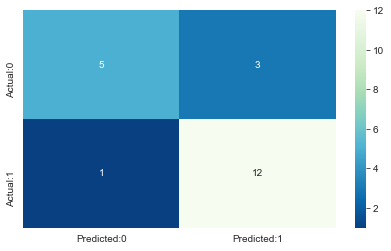

In [78]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (7,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="GnBu_r")

In [80]:
def get_acc(y_pred,y_actual):
    return np.sum(y_pred == y_actual)/len(y_actual)

In [81]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


In [82]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=614)
n= 25

In [94]:
accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    log_reg_clone = clone(log_reg)
    log_reg_clone.fit(X_train.reshape(-1,1),y_train)
    probs = log_reg_clone.predict_proba(X_train,y_train.ravel())
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train, X_train_test = X_train[train_index],X_train[test_index]
        y_train, y_train_test = y_train[train_index],y_train[test_index]
       

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train.ravel())
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

/Users/exauceemanishimwe/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Found input variables with inconsistent numbers of samples: [2160, 60]

In [95]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [98]:
cutoffs = np.arange(0,.98,.01)

precs = np.zeros((5,len(cutoffs)))
recs = np.zeros((5,len(cutoffs)))
f1s = np.zeros((5,len(cutoffs)))


log_reg = LogisticRegression()

i = 0
for train_index,test_index in kfold.split(X_train,y_train):
    X_train_train,X_train_test = X_train[train_index],X_train[test_index]
    y_train_train,y_train_test = y_train[train_index],y_train[test_index]
    

